In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

In [19]:
import re 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rabis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB

In [61]:
sw=stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [62]:
len(sw)

179

In [78]:
dataset=pd.read_csv('C:\\Users\\rabis\\Desktop\\NLP\\NLP\\Natural_Language_Processing\\Restaurant_Reviews.tsv', delimiter='\t' )

In [79]:
dataset.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [80]:
dataset.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

In [81]:
senntiment_words=[]
for row in dataset['Liked']:
    if row==0:
        senntiment_words.append('Negative')
    else:
        senntiment_words.append('Positive')
dataset['senntiment_word']=senntiment_words

In [85]:
word_count=pd.value_counts(dataset['senntiment_word'].values, sort=False)
word_count

Positive    500
Negative    500
dtype: int64

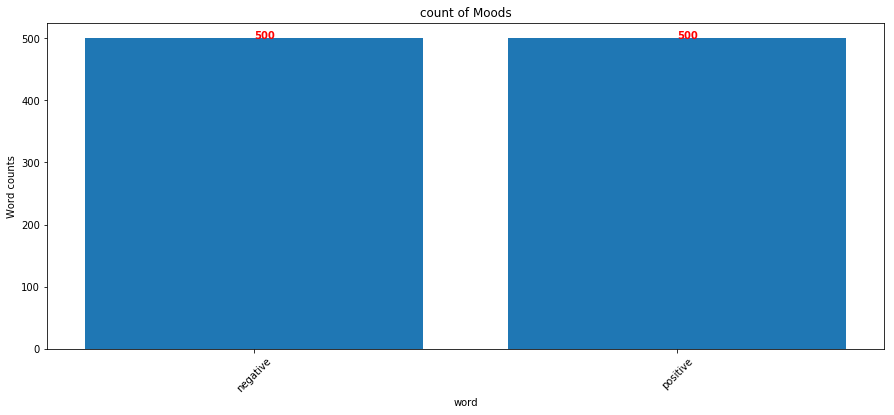

In [88]:
index=[1,2]
plt.figure(figsize=(15,6))
plt.bar(index, word_count, color='c')
plt.xticks(index, ['negative', 'positive'], rotation=45)
plt.xlabel("word")
plt.ylabel("Word counts")
plt.title("count of Moods")
plt.bar(index, word_count)
for a, b in zip(index, word_count):
    plt.text(a, b , str(b), color='red', fontweight='bold')
plt.show()

In [90]:
def review_to_words(raw_review):
    review=raw_review
    review=re.sub('[^a-zA-Z]', ' ', review)
    review=review.lower()
    review=review.split()
    lem=WordNetLemmatizer()
    review=[lem.lemmatize(w) for w in review if not w in set(stopwords.words('english'))]
    return ''.join(review)

In [91]:
dataset.shape

(1000, 3)

In [92]:
corpus=[]
for i in range(0, 1000):
    corpus.append(review_to_words(dataset['Review'][i]))

In [93]:
corpus1=[]
for i in range(0, 1000):
    corpus1.append(review_to_words(dataset['Review'][i]))

In [94]:
dataset['new_corpus']=corpus

In [95]:
dataset.head()

,Review,Liked,senntiment_word,new_corpus
0,Wow... Loved this place.,1,Positive,wowlovedplace
1,Crust is not good.,0,Negative,crustgood
2,Not tasty and the texture was just nasty.,0,Negative,tastytexturenasty
3,Stopped by during the late May bank holiday of...,1,Positive,stoppedlatemaybankholidayricksteverecommendati...
4,The selection on the menu was great and so wer...,1,Positive,selectionmenugreatprice


In [96]:
dataset.drop(['Review'], axis=1,inplace=True)

In [97]:
dataset.head()

,Liked,senntiment_word,new_corpus
0,1,Positive,wowlovedplace
1,0,Negative,crustgood
2,0,Negative,tastytexturenasty
3,1,Positive,stoppedlatemaybankholidayricksteverecommendati...
4,1,Positive,selectionmenugreatprice


In [99]:
positive=dataset[dataset['senntiment_word']==('Positive')]

In [100]:
word=' '.join(positive['new_corpus'])
split_word=" ".join([word for word in word.split()])

In [105]:
wordCloud=WordCloud(stopwords=STOPWORDS, background_color='black', width=2000, height=1500).generate(split_word)

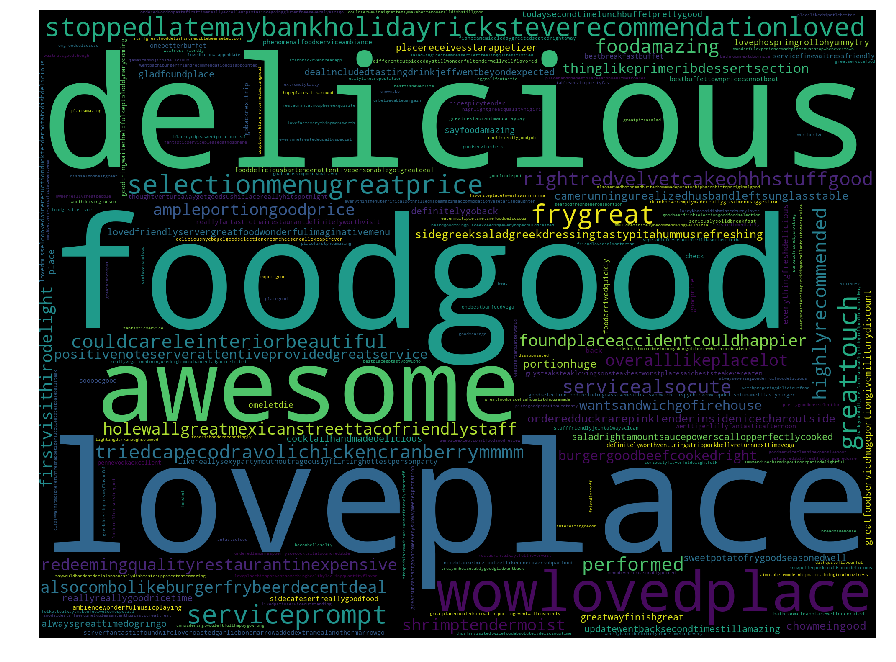

In [107]:
plt.figure(figsize=(15,15))
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [120]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1500)
x_train=cv.fit_transform(corpus).toarray()
x_test=cv.fit_transform(corpus1).toarray()
y=dataset.iloc[:,1].values

In [152]:
from sklearn.cross_validation import train_test_split
X_train,X_test, y_train, y_test=train_test_split(x_train, y, test_size=0.4, random_state=0)


In [153]:
clf=GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [154]:
y_pred=clf.predict(X_test)

In [158]:
from sklearn.metrics import confusion_matrix, consensus_score

In [156]:
cm=confusion_matrix(y_test, y_pred)

In [157]:
cm

array([[200,   0],
       [198,   2]], dtype=int64)

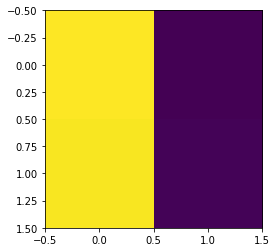

In [161]:
plt.imshow(cm)

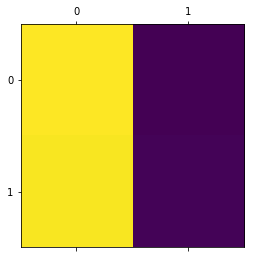

In [163]:
plt.matshow(cm)
plt.show()